In [1]:
##4grt11 Circuit
##All Imports Here

#Non-qiskit imports
import numpy as np
import matplotlib.pyplot as plt
import time

#Qiskit imports
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit,Aer
from qiskit.circuit.library import XGate, YGate, ZGate, HGate, CXGate, SwapGate, CCXGate, RZGate
from qiskit.compiler import transpile
from qiskit.providers.fake_provider import FakeValencia
#from qiskit.quantum_info import Operator
from qiskit.circuit.random import random_circuit


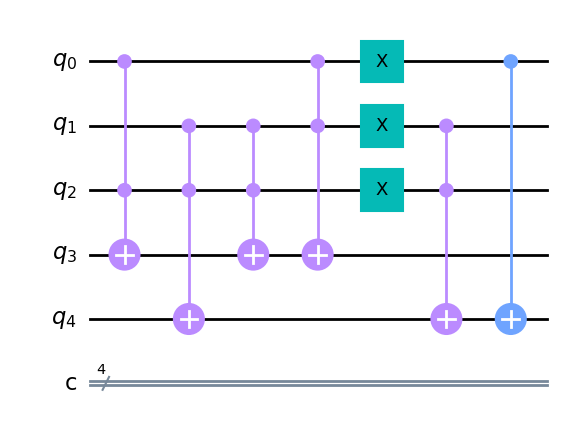

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(4, 'c')

cal_qc = QuantumCircuit(qreg_q, creg_c)

cal_qc.ccx(qreg_q[0], qreg_q[2], qreg_q[3])
cal_qc.ccx(qreg_q[1], qreg_q[2], qreg_q[4])
cal_qc.ccx(qreg_q[1], qreg_q[2], qreg_q[3])
cal_qc.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
cal_qc.x(qreg_q[1])
cal_qc.x(qreg_q[2])
cal_qc.ccx(qreg_q[1], qreg_q[2], qreg_q[4])
cal_qc.x(qreg_q[0])
cal_qc.cx(qreg_q[0], qreg_q[4])
backend = FakeValencia()
#backend = Aer.get_backend('qasm_simulator')

layers = cal_qc.depth()

compiled_cal_qc = transpile(cal_qc, backend)

# Save the circuit to a QASM file
file_path = '1bitadder.qasm'
with open(file_path, 'w') as file:
    file.write(compiled_cal_qc.qasm())

cal_qc.draw(output='mpl')


In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

n_qbits = 5
data = 2

qreg_q = QuantumRegister(n_qbits, 'q')
creg_c = ClassicalRegister(data, 'c')

in_circuits = []

for i in range(8):
    in_qc = QuantumCircuit(qreg_q, creg_c)

    # Apply X gates based on the binary representation of 'i'
    binary_rep = format(i, '04b')
    for j in range(len(binary_rep)):
        if binary_rep[j] == '1':
            in_qc.x(qreg_q[j-1])

    in_qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])

    in_circuits.append(in_qc)

# Printing the circuit representations
for i, in_qc in enumerate(in_circuits):
    print(f"Circuit {i+1}:")
    print(in_qc)



Circuit 1:
      ░ 
q_0: ─░─
      ░ 
q_1: ─░─
      ░ 
q_2: ─░─
      ░ 
q_3: ─░─
      ░ 
q_4: ─░─
      ░ 
c: 2/═══
        
Circuit 2:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     └───┘ ░ 
q_3: ──────░─
           ░ 
q_4: ──────░─
           ░ 
c: 2/════════
             
Circuit 3:
           ░ 
q_0: ──────░─
     ┌───┐ ░ 
q_1: ┤ X ├─░─
     └───┘ ░ 
q_2: ──────░─
           ░ 
q_3: ──────░─
           ░ 
q_4: ──────░─
           ░ 
c: 2/════════
             
Circuit 4:
           ░ 
q_0: ──────░─
     ┌───┐ ░ 
q_1: ┤ X ├─░─
     ├───┤ ░ 
q_2: ┤ X ├─░─
     └───┘ ░ 
q_3: ──────░─
           ░ 
q_4: ──────░─
           ░ 
c: 2/════════
             
Circuit 5:
     ┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
q_3: ──────░─
           ░ 
q_4: ──────░─
           ░ 
c: 2/════════
             
Circuit 6:
     ┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     

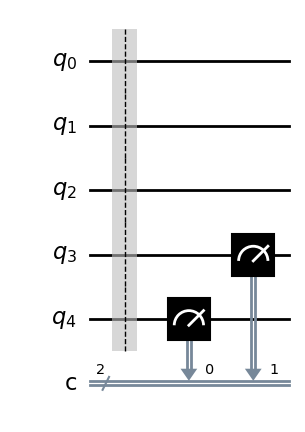

In [4]:
##Measurement/Output circuit = out_qc

##Measurement/Output circuit = out_qc

out_qc = QuantumCircuit(qreg_q, creg_c)

out_qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3],qreg_q[4] )
out_qc.measure(qreg_q[4], creg_c[0])
out_qc.measure(qreg_q[3], creg_c[1])

out_qc.draw(output='mpl')


In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler.passes import RemoveResetInZeroState, Unroller
from qiskit.transpiler import PassManager
from qiskit.circuit.library.standard_gates import IGate

# Create a new circuit to store the modified version
mod_qc = QuantumCircuit(cal_qc.num_qubits)

# Iterate through the original circuit and replace NOT gates with Identity gates
for instr, qargs, cargs in cal_qc:
    if instr.name == 'h':
        # If it's an X gate (NOT gate), replace with Identity gate
        mod_qc.append(IGate(), qargs)
    else:
        # If it's not an X gate, keep the original instruction
        mod_qc.append(instr, qargs, cargs)

print(mod_qc)


                         ┌───┐          
q_0: ──■──────────────■──┤ X ├───────■──
       │              │  ├───┤       │  
q_1: ──┼────■────■────■──┤ X ├──■────┼──
       │    │    │    │  ├───┤  │    │  
q_2: ──■────■────■────┼──┤ X ├──■────┼──
     ┌─┴─┐  │  ┌─┴─┐┌─┴─┐└───┘  │    │  
q_3: ┤ X ├──┼──┤ X ├┤ X ├───────┼────┼──
     └───┘┌─┴─┐└───┘└───┘     ┌─┴─┐┌─┴─┐
q_4: ─────┤ X ├───────────────┤ X ├┤ X ├
          └───┘               └───┘└───┘


In [6]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate

# Initialize an empty list to store the modified circuits
modified_circuits_before = []


# Iterate over each qubit
for qubit in qreg_q:
    # Create a new circuit for the modified version
    modified_qc_before = QuantumCircuit(qreg_q, creg_c)
    
   
    # Keep track of whether a NOT gate has been inserted before and after the current qubit
    not_before_inserted = False

    # Iterate over each gate in the original circuit
    for instruction, qargs, cargs in mod_qc:
        
        # Check if the gate involves the current qubit
        if qubit not in qargs:
            # Insert a NOT gate before the gate if not already inserted
            if not_before_inserted:
                modified_qc_before.append(instruction, qargs, cargs)  
            else:
                modified_qc_before.h(qubit)
                modified_qc_before.append(instruction, qargs, cargs)
                not_before_inserted = True                       
        else:
            not_before_inserted=False
            modified_qc_before.append(instruction, qargs, cargs)        
            
  
    modified_circuits_before.append(modified_qc_before)
            


# Initialize a list to store the modified circuits
new_circuits1 = []

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'h']
    
    # Iterate over the instructions in the circuit
    for i, (instruction, qargs, cargs) in enumerate(modified_qc_before):
        if instruction.name == 'h' and i in not_gate_indices:
            # If the NOT gate is present in cal_qc for this qubit, continue without creating a new circuit
            

            # Create a new circuit for each NOT gate
            new_qc = modified_qc_before.copy()
            # Add the corresponding NOT gate to the new circuit
            new_qc.h(qargs[0])

            # Add the remaining gates from the original circuit to the new circuit
            for j in reversed(range(len(new_qc))):
                if new_qc[j][0].name == 'h' and j != i:
                    new_qc.data.pop(j)

            new_depth_b = new_qc.depth()
            new_mod_qc = QuantumCircuit(cal_qc.num_qubits)

            # Add the modified circuits to the list
            if new_depth_b == layers:
                # Iterate through the original circuit and replace NOT gates with Identity gates
                for instr, qargs, cargs in new_qc:
                    if instr.name == 'id':
                        # If it's an X gate (NOT gate), replace with Identity gate
                        new_mod_qc.append(XGate(), qargs)
                    else:
                        # If it's not an X gate, keep the original instruction
                        new_mod_qc.append(instr, qargs, cargs)
                new_circuits1.append(new_mod_qc)

# Rest of the code remains the same


# Rest of the code remains the same

           

def remove_duplicates(circuit_list):
    # Initialize an empty set to store the unique circuits
    unique_circuits = set()
    
    # Initialize a new list to store the circuits without duplicates
    new_circuit_list = []
    
    # Iterate over each circuit in the original list
    for circuit in circuit_list:
        # Convert the circuit to a custom string representation
        circuit_str = str(circuit)
        
        # Check if the circuit string is already in the set
        if circuit_str not in unique_circuits:
            # If not, add it to the set and the new list
            unique_circuits.add(circuit_str)
            new_circuit_list.append(circuit)
    
    return new_circuit_list

# Your list of circuits (assuming it is already defined)
# circuit_list = [circuit1, circuit2, circuit3, ...]

# Call the remove_duplicates function to get the new list without duplicates
new_circuit_list = remove_duplicates(new_circuits1)        


# Display and save the modified circuits
#for i, modified_qc_before in enumerate(modified_circuits_before):
    #print(f"Modified Circuit (before) for qubit {i}:")
    #modified_qc_before.draw(output='mpl', filename=f"not_before_qubit_{i}.png")
    #print()

for i, new_qc in enumerate(new_circuit_list):
    print(f"hadamard trojan for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"not_qubit_{i}.png")
    compiled_new_qc = transpile(new_qc, backend)

    file_path = f"hadamard_1bitadder_{i}.qasm"
    with open(file_path, 'w') as file:
        file.write(compiled_new_qc.qasm())
    print()





hadamard trojan for qubit 0:

hadamard trojan for qubit 1:

hadamard trojan for qubit 2:

hadamard trojan for qubit 3:

hadamard trojan for qubit 4:

hadamard trojan for qubit 5:

hadamard trojan for qubit 6:

hadamard trojan for qubit 7:

hadamard trojan for qubit 8:

hadamard trojan for qubit 9:



In [8]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate

# Initialize an empty list to store the modified circuits
modified_circuits_before = []


# Iterate over each qubit
for qubit in qreg_q:
    # Create a new circuit for the modified version
    modified_qc_before = QuantumCircuit(qreg_q, creg_c)
    
   
    # Keep track of whether a NOT gate has been inserted before and after the current qubit
    not_before_inserted = False

    # Iterate over each gate in the original circuit
    for instruction, qargs, cargs in mod_qc:
        
        # Check if the gate involves the current qubit
        if qubit not in qargs:
            # Insert a NOT gate before the gate if not already inserted
            if not_before_inserted:
                modified_qc_before.append(instruction, qargs, cargs)  
            else:
                modified_qc_before.x(qubit)
                modified_qc_before.append(instruction, qargs, cargs)
                not_before_inserted = True                       
        else:
            not_before_inserted=False
            modified_qc_before.append(instruction, qargs, cargs)        
            
    #new_depth_b =  modified_qc_before.depth()
    # Add the modified circuits to the list
    #if new_depth_b == layers:
        modified_circuits_before.append(modified_qc_before)
            
# Define a helper function to check if a qubit already has a NOT gate in a circuit
def has_not_gate(circuit, qubit):
    for gate, qargs, _ in circuit.data:
        if gate.name == 'x' and qargs[0] == qubit:
            return True
    return False

# Initialize a list to store the modified circuits
new_circuits1 = []

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'x']
    
    # Iterate over the instructions in the circuit
    for i, (instruction, qargs, cargs) in enumerate(modified_qc_before):
        if instruction.name == 'x' and i in not_gate_indices:
            # If the NOT gate is present in cal_qc for this qubit, continue without creating a new circuit
            if has_not_gate(cal_qc, qargs[0]):
                continue

            # Create a new circuit for each NOT gate
            new_qc = modified_qc_before.copy()
            # Add the corresponding NOT gate to the new circuit
            new_qc.x(qargs[0])

            # Add the remaining gates from the original circuit to the new circuit
            for j in reversed(range(len(new_qc))):
                if new_qc[j][0].name == 'x' and j != i and not has_not_gate(cal_qc, new_qc[j][1][0]):
                    new_qc.data.pop(j)

            new_depth_b = new_qc.depth()
            # Add the modified circuits to the list
            if new_depth_b == layers:
                new_circuits1.append(new_qc)

# Rest of the code remains the same


# Rest of the code remains the same

           

def remove_duplicates(circuit_list):
    # Initialize an empty set to store the unique circuits
    unique_circuits = set()
    
    # Initialize a new list to store the circuits without duplicates
    new_circuit_list = []
    
    # Iterate over each circuit in the original list
    for circuit in circuit_list:
        # Convert the circuit to a custom string representation
        circuit_str = str(circuit)
        
        # Check if the circuit string is already in the set
        if circuit_str not in unique_circuits:
            # If not, add it to the set and the new list
            unique_circuits.add(circuit_str)
            new_circuit_list.append(circuit)
    
    return new_circuit_list

# Your list of circuits (assuming it is already defined)
# circuit_list = [circuit1, circuit2, circuit3, ...]

# Call the remove_duplicates function to get the new list without duplicates
new_circuit_list = remove_duplicates(new_circuits1)        


# Display and save the modified circuits
#for i, modified_qc_before in enumerate(modified_circuits_before):
    #print(f"Modified Circuit (before) for qubit {i}:")
    #modified_qc_before.draw(output='mpl', filename=f"not_before_qubit_{i}.png")
    #print()

for i, new_qc in enumerate(new_circuit_list):
    print(f"Modified Circuit (before) for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"not_qubit_{i}.png")
    #depthfinal = new_qc.depth()
    #print(depthfinal)
    print()





Modified Circuit (before) for qubit 0:

Modified Circuit (before) for qubit 1:

Modified Circuit (before) for qubit 2:

Modified Circuit (before) for qubit 3:



Infected circuit 0
Input:0
{'00': 433, '01': 425, '10': 77, '11': 65}
{'0000': 719, '0001': 138, '0010': 108, '0011': 35}
Input:1
{'00': 422, '01': 413, '10': 84, '11': 81}
{'0000': 192, '0001': 657, '0010': 41, '0011': 110}
Input:2
{'00': 202, '01': 379, '10': 315, '11': 104}
{'0000': 176, '0001': 637, '0010': 65, '0011': 122}
Input:3
{'00': 173, '01': 346, '10': 341, '11': 140}
{'0000': 228, '0001': 85, '0010': 572, '0011': 115}
Input:4
{'00': 441, '01': 403, '10': 81, '11': 75}
{'0000': 186, '0001': 693, '0010': 45, '0011': 76}
Input:5
{'00': 131, '01': 101, '10': 415, '11': 353}
{'0000': 168, '0001': 56, '0010': 624, '0011': 152}
Input:6
{'00': 198, '01': 376, '10': 322, '11': 104}
{'0000': 196, '0001': 102, '0010': 601, '0011': 101}
Input:7
{'00': 368, '01': 146, '10': 163, '11': 323}
{'0000': 113, '0001': 180, '0010': 136, '0011': 571}
Infected circuit 1
Input:0
{'00': 440, '01': 422, '10': 74, '11': 64}
{'0000': 699, '0001': 138, '0010': 130, '0011': 33}
Input:1
{'00': 438, '01'

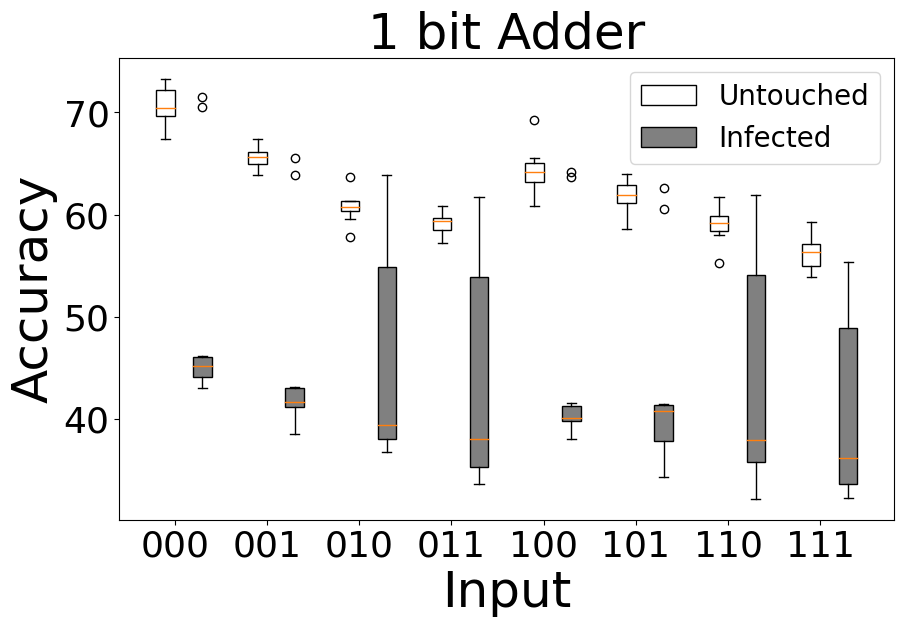

In [7]:
results_correct = {}  # Initialize an empty dictionary to store arrays
results_noisy = {}  # Initialize an empty dictionary to store arrays
# mean_degradation_array=[]
# max_degradation_array=[]
# min_degradation_array=[]
degradation_flip=[]
degradation_nonflip=[]
degradation=[]      


for i, in_qc in enumerate(in_circuits):        
    rn_name = f"result_n_{i}"  # Create a string with the desired array name
    results_noisy[rn_name] = []
    rc_name = f"result_c_{i}"  # Create a string with the desired array name
    results_correct[rc_name] = []

for i, new_qc in enumerate(new_circuit_list):
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_qc.draw(output='mpl')
    cal_out_qc = new_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        print(f"Input:{i}")
        rn_name = f"result_n_{i}"  # Create a string with the desired array name
        rc_name = f"result_c_{i}"  # Create a string with the desired array name
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = [i for i in range(1000, 1501, 100)]
        #for i in shots:
        #print(f"Shots: {i}:")    
        backend = FakeValencia()
        #backend = Aer.get_backend('qasm_simulator')
        qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc_noisy,shots=1000).result()
        
        # Extract the counts from the results
        count_noisy = results.get_counts(qc_noisy)

        #sort the counts

        count_noisy = dict(sorted(count_noisy.items()))
        print(count_noisy)
        #if i == 1000:
        cal_clean_qc = cal_qc.compose(out_qc, front=False, inplace=False)
        #cal_clean_qc.draw(output='mpl')
        org_c_qc = cal_clean_qc.compose(in_qc, front=True, inplace=False)
        #org_c_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = 1000    
        backend = FakeValencia()
        #backend = Aer.get_backend('qasm_simulator')
        qc = transpile(org_c_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc,shots=1000).result()
        
        # Extract the counts from the results
        count = results.get_counts(qc)

        #sort the counts

        count = dict(sorted(count.items()))
        
        print(count)
        try:
            if ((count_noisy['01']/1000 > 0.5) and (count['0001']/1000 > 0.5)):
                diff = count['0001']-count_noisy['01']
                degradation_nonflip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0001']/10)
                results_noisy[rn_name].append(count_noisy['01']/10)      
        except KeyError:
            pass
        try:
            if ((count_noisy['00']/1000 > 0.5) and (count['0000']/1000 > 0.5)):
                diff = count['0000']-count_noisy['00']
                degradation_nonflip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0000']/10)
                results_noisy[rn_name].append(count_noisy['00']/10)        
        except KeyError:
            pass
        try:
            if ((count_noisy['00']/1000 < 0.5) and (count['0000']/1000 > 0.5)):
                diff = count['0000']-count_noisy['00']
                degradation_flip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0000']/10)
                results_noisy[rn_name].append(count_noisy['00']/10)        
        except KeyError:
            pass
        try:
            if ((count_noisy['01']/1000 < 0.5) and (count['0001']/1000 > 0.5)):
                diff = count['0001']-count_noisy['01']
                degradation_flip.append(diff/10)  
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0001']/10)
                results_noisy[rn_name].append(count_noisy['01']/10)      
        except KeyError:
            pass
        try:
            if ((count_noisy['11']/1000 > 0.5) and (count['0011']/1000 > 0.5)):
                diff = count['0011']-count_noisy['11']
                degradation_nonflip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0011']/10)
                results_noisy[rn_name].append(count_noisy['11']/10)        
        except KeyError:
            pass
        try:
            if ((count_noisy['10']/1000 > 0.5) and (count['0010']/1000 > 0.5)):
                diff = count['0010']-count_noisy['10']
                degradation_nonflip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0010']/10)
                results_noisy[rn_name].append(count_noisy['10']/10)        
        except KeyError:
            pass
        try:
            if ((count_noisy['11']/1000 < 0.5) and (count['0011']/1000 > 0.5)):
                diff = count['0011']-count_noisy['11']
                degradation_flip.append(diff/10) 
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0011']/10)
                results_noisy[rn_name].append(count_noisy['11']/10)       
        except KeyError:
            pass
        try:
            if ((count_noisy['10']/1000 < 0.5) and (count['0010']/1000 > 0.5)):
                diff = count['0010']-count_noisy['10']
                degradation_flip.append(diff/10) 
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0010']/10)
                results_noisy[rn_name].append(count_noisy['10']/10)
        except KeyError:
            pass

        
        # if (count['0000']/1000 > 0.5):
        #     results_correct[rc_name].append(count['0000']/10)
        #     results_noisy[rn_name].append(count_noisy['00']/10)
        # else:
        #     if (count['0001']/1000 > 0.5):
        #         results_correct[rc_name].append(count['0001']/10)
        #         results_noisy[rn_name].append(count_noisy['01']/10)
        #     else:
        #         if (count['0010']/1000 > 0.5):
        #             results_correct[rc_name].append(count['0010']/10)
        #             results_noisy[rn_name].append(count_noisy['10']/10)
        #         else:
        #             if (count['0011']/1000 > 0.5):
        #                 results_correct[rc_name].append(count['0011']/10)
        #                 results_noisy[rn_name].append(count_noisy['11']/10)

# for i, in_qc in enumerate(in_circuits):
#     rn_name = f"result_n_{i}"  # Create a string with the desired array name
#     rc_name = f"result_c_{i}"  # Create a string with the desired array name
#     mean_difference=np.mean(results_correct[rc_name])-np.mean(results_noisy[rn_name])
#     mean_degradation_array.append(mean_difference)
#     max_difference=np.max(results_correct[rc_name])-np.min(results_noisy[rn_name])
#     max_degradation_array.append(max_difference)
#     min_difference=np.min(results_correct[rc_name])-np.max(results_noisy[rn_name])
#     min_degradation_array.append(min_difference)

        
avg_degradation_nf=np.mean(degradation_nonflip)   
max_degradation_nf=np.max(degradation_nonflip) 
min_degradation_nf=np.min(degradation_nonflip)    
print(avg_degradation_nf,max_degradation_nf, min_degradation_nf)
avg_degradation_f=np.mean(degradation_flip)   
max_degradation_f=np.max(degradation_flip) 
min_degradation_f=np.min(degradation_flip)    
print(avg_degradation_f,max_degradation_f, min_degradation_f)
avg_degradation=np.mean(degradation)
print(avg_degradation)


import matplotlib.pyplot as plt
import numpy as np

# Extract data from both dictionaries
data_to_plot_correct = list(results_correct.values())
data_to_plot_noisy = list(results_noisy.values())

# Determine the number of keys (assuming both dictionaries have the same keys)
num_keys = len(results_correct)

# Create positions for the side-by-side box plots
positions = np.arange(num_keys)

# Set up the figure
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

# Custom labels for x-axis (keys)
custom_labels = ['000','001', '010', '011','100','101','110','111']  # Replace with your custom labels

# Create side-by-side box plots for each key
for i, (data_correct, data_noisy) in enumerate(zip(data_to_plot_correct, data_to_plot_noisy)):
    position_correct = positions[i]
    position_noisy = positions[i] + 0.4  # Offset for side-by-side arrangement

    box_plot_correct = plt.boxplot(data_correct, positions=[position_correct], widths=0.2, patch_artist=True)
    box_plot_noisy = plt.boxplot(data_noisy, positions=[position_noisy], widths=0.2, patch_artist=True)

    # Customize box colors
    box_plot_correct['boxes'][0].set_facecolor('white')
    box_plot_noisy['boxes'][0].set_facecolor('grey')

# Set x-axis ticks and labels
plt.xticks(positions + 0.1, custom_labels,fontsize=26)
plt.yticks(fontsize=26)
plt.xlabel('Input',fontsize=36)
plt.ylabel('Accuracy',fontsize=36)
plt.title('1 bit Adder',fontsize=36)

# Add legend
plt.legend([box_plot_correct['boxes'][0], box_plot_noisy['boxes'][0]], ['Untouched', 'Infected'],fontsize=20,loc='upper right')

plt.show()




In [ ]:
from itertools import combinations
new_circuits2 = []         

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'x']

    # Iterate over the instructions in the circuit
    for combination in combinations(not_gate_indices, 2):
        new_qc = modified_qc_before.copy()                             
            
        # Add the remaining gates from the original circuit to the new circuit
        for j in reversed(range(len(new_qc))):
            if j not in combination and new_qc[j][0].name == 'x':
                new_qc.data.pop(j)
        
        # Add the modified circuit to the list
        new_circuits2.append(new_qc)


for i, new_qc in enumerate(new_circuits2):
    print(f"Modified Circuit (before) for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"not_{i}.png")
    print()

In [ ]:
from qiskit import QuantumCircuit





# Generate circuits with an extra NOT gate from each circuit in modified_circuits_before
modified_cal_circuits = []
for modified_qc_before in modified_circuits_before:
    # Create a new circuit by combining modified_circuit with cal_qc
    modified_cal_circuit = cal_qc.copy()
    
    # Add the extra NOT gate from modified_circuit to modified_cal_circuit
    for instruction, qargs, cargs in modified_qc_before:
        if instruction.name == 'x':
            modified_cal_circuit.x(qargs[0])
    
    # Add the modified_cal_circuit to the list
    modified_cal_circuits.append(modified_cal_circuit)



for i, modified_cal_circuit in enumerate(modified_cal_circuits):
    print(f"Modified Circuit new for qubit {i}:")
    modified_cal_circuit.draw(output='mpl', filename=f"new_{i}.png")
    print()


Modified Circuit new for qubit 0:

Modified Circuit new for qubit 1:

Modified Circuit new for qubit 2:

Modified Circuit new for qubit 3:

Modified Circuit new for qubit 4:



In [ ]:

cal_out_qc = cal_qc.compose(out_qc, front=False, inplace=False)
cal_out_qc.draw(output='mpl')
## in_qc + cal_out_qc= org_qc
for i, in_qc in enumerate(in_circuits):
    print(f"Input:{i}")
    org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
    org_qc.draw(output='mpl')
    # Run the circuit and get results
    shots = 1000    
    backend = FakeValencia()
    qc = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
    results = backend.run(qc,shots=shots).result()
    
    # Extract the counts from the results
    count = results.get_counts(qc)

    #sort the counts

    count = dict(sorted(count.items()))

    print(count)
    print(count[1])

    #draw a histogram

    

Input:0
{'0000': 916, '0001': 84}


KeyError: 1

Infected circuit 0
Input:0
Shots: 1000:
{'0': 899, '1': 101}
Shots: 1100:
{'0': 991, '1': 109}
Shots: 1200:
{'0': 1074, '1': 126}
Shots: 1300:
{'0': 1174, '1': 126}
Shots: 1400:
{'0': 1236, '1': 164}
Shots: 1500:
{'0': 1336, '1': 164}
Input:1
Shots: 1000:
{'0': 897, '1': 103}
Shots: 1100:
{'0': 964, '1': 136}
Shots: 1200:
{'0': 1062, '1': 138}
Shots: 1300:
{'0': 1129, '1': 171}
Shots: 1400:
{'0': 1255, '1': 145}
Shots: 1500:
{'0': 1334, '1': 166}
Input:2
Shots: 1000:
{'0': 898, '1': 102}
Shots: 1100:
{'0': 958, '1': 142}
Shots: 1200:
{'0': 1066, '1': 134}
Shots: 1300:
{'0': 1172, '1': 128}
Shots: 1400:
{'0': 1230, '1': 170}
Shots: 1500:
{'0': 1328, '1': 172}
Input:3
Shots: 1000:
{'0': 876, '1': 124}
Shots: 1100:
{'0': 969, '1': 131}
Shots: 1200:
{'0': 1046, '1': 154}
Shots: 1300:
{'0': 1153, '1': 147}
Shots: 1400:
{'0': 1225, '1': 175}
Shots: 1500:
{'0': 1321, '1': 179}
Input:4
Shots: 1000:
{'0': 896, '1': 104}
Shots: 1100:
{'0': 970, '1': 130}
Shots: 1200:
{'0': 1082, '1': 118}
Shots:

In [1]:
for i, new_qc in enumerate(new_circuits1):
    results_noisy = [] 
    results_correct_flip =[]
    results_correct =[]
    results_noisy_flip =[]
    flip_circuits=[]
    non_flip_circuits=[]
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_qc.draw(output='mpl')
    cal_out_qc = new_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        print(f"Input:{i}")
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = [i for i in range(1000, 1501, 100)]
        #for i in shots:
        #print(f"Shots: {i}:")    
        backend = FakeValencia()
        qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc_noisy,shots=1000).result()
        
        # Extract the counts from the results
        count_noisy = results.get_counts(qc_noisy)

        #sort the counts

        count_noisy = dict(sorted(count_noisy.items()))
        


        print(count_noisy)
        #if i == 1000:
        cal_clean_qc = cal_qc.compose(out_qc, front=False, inplace=False)
        #cal_clean_qc.draw(output='mpl')
        org_c_qc = cal_clean_qc.compose(in_qc, front=True, inplace=False)
        #org_c_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = 1000    
        backend = FakeValencia()
        qc = transpile(org_c_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc,shots=1000).result()
        
        # Extract the counts from the results
        count = results.get_counts(qc)

        #sort the counts

        count = dict(sorted(count.items()))
        
        print(count)

        if (count['0011']/1000 > 0.5):
            if (count_noisy['11']/1000 > 0.5):
                diff = count_noisy['11']-count['0011']
                print(f"diff={diff}")
                results_correct.append(count['0011']/10)
                results_noisy.append(count_noisy['11']/10)
                non_flip_circuits.append(i)
            else:
                results_correct_flip.append(count['0011']/10)
                results_noisy_flip.append(count_noisy['11']/10)
                flip_circuits.append(i)
        
        if (count['0000']/1000 > 0.5):
            if (count_noisy['00']/1000 > 0.5):
                diff = count_noisy['00']-count['0000']
                print(f"diff={diff}")
                results_correct.append(count['0000']/10)
                results_noisy.append(count_noisy['00']/10)
                non_flip_circuits.append(i)
            else:
                results_correct_flip.append(count['0000']/10)
                results_noisy_flip.append(count_noisy['00']/10)
                flip_circuits.append(i)

        if (count['0001']/1000 > 0.5):
            if (count_noisy['01']/1000 > 0.5):
                diff = count_noisy['01']-count['0001']
                print(f"diff={diff}") 
                results_correct.append(count['0001']/10)
                results_noisy.append(count_noisy['01']/10)
                non_flip_circuits.append(i)
            else:
                results_correct_flip.append(count['0001']/10)
                results_noisy_flip.append(count_noisy['01']/10)
                flip_circuits.append(i)

        if (count['0010']/1000 > 0.5):
            if (count_noisy['10']/1000 > 0.5):
                diff = count_noisy['10']-count['0010']
                print(f"diff={diff}")  
                results_correct.append(count['0010']/10)
                results_noisy.append(count_noisy['10']/10)
                non_flip_circuits.append(i)
            else:
                results_correct_flip.append(count['0010']/10)
                results_noisy_flip.append(count_noisy['10']/10)
                flip_circuits.append(i)
    import matplotlib.pyplot as plt
    import numpy as np

    # Assuming 'array1' and 'array2' are your arrays of data

    # Plot the data from both arrays
    plt.figure()  
    plt.plot(non_flip_circuits, results_correct, label='unattacked circuit')
    plt.plot(non_flip_circuits, results_noisy, label='trojan infected circuit')

    # Set labels and title
    plt.xlabel('Input')
    plt.ylabel('Accuracy')
    plt.title('Non-flipping Trojans')


    # Display legend
    plt.legend()

    # Show the plot
    plt.show()
    plt.clf()  # Clear the plot to create a new one

    plt.figure()  
    plt.plot(flip_circuits, results_correct_flip, label='unattacked circuit')
    plt.plot(flip_circuits, results_noisy_flip, label='trojan infected circuit')

    # Set labels and title
    plt.xlabel('Input')
    plt.ylabel('Accuracy')
    plt.title('Flipping Trojans')

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()
    plt.clf()  # Clear the plot to create a new one



NameError: name 'new_circuits1' is not defined

In [15]:

# Find the first differing gate between the two circuits
index_diff = None
for i, gate in enumerate(cal_qc.data):
    if i >= len(new_mod_qc.data) or gate != new_mod_qc.data[i]:
        index_diff = i
        break

# If there is a difference, check if it is an X gate on qubit 1
if index_diff is not None and cal_qc.data[index_diff][0].name == 'x' and cal_qc.data[index_diff][1] == [1]:
    new_mod_qc.data.pop(index_diff)  # Remove the extra NOT gate from new_mod_qc

# Check equivalence again
if are_circuits_equivalent(cal_qc, new_mod_qc):
    print("Extra NOT gate removed. Circuits are now equivalent.")
else:
    print("Failed to make the circuits equivalent.")

NameError: name 'are_circuits_equivalent' is not defined

In [18]:
from qiskit import QuantumCircuit, transpile, Aer, assemble


def are_circuits_equivalent(circuit1, circuit2):
    backend = Aer.get_backend('unitary_simulator')
    job1 = assemble(transpile(circuit1, backend=backend), backend=backend)
    job2 = assemble(transpile(circuit2, backend=backend), backend=backend)
    result1 = backend.run(job1).result()
    result2 = backend.run(job2).result()
    unitary1 = result1.get_unitary()
    unitary2 = result2.get_unitary()
    return unitary1 == unitary2
# Find the first differing gate between the two circuits
index_diff = None
for i, gate in enumerate(cal_qc.data):
    if i >= len(new_mod_qc.data) or gate != new_mod_qc.data[i]:
        index_diff = i
        break

# If there is a difference, check if it is an X gate on qubit 1
if index_diff is not None and cal_qc.data[index_diff][0].name == 'x' and cal_qc.data[index_diff][1] == [1]:
    new_mod_qc.data.pop(index_diff)  # Remove the extra NOT gate from new_mod_qc

# Check equivalence again
if are_circuits_equivalent(cal_qc, new_mod_qc):
    print("Extra NOT gate removed. Circuits are now equivalent.")
else:
    print("Failed to make the circuits equivalent.")

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_35548\653853605.py:8: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result1 = backend.run(job1).result()


TypeError: AerBackend._run_qobj() got multiple values for argument 'parameter_binds'